## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 2</center></h1>
### <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Hai Nguyen</center></h1>
##### <h1><center>Due day: 11:00 pm, Thursday, 22 September, 2022 </center></h1>
#### If you gonna use this jupyter notebook for the assignment, please convert to .pdf file for submission. All submission must be in pdf format except codes.

6. (+5) Comparing the number of wrongly predicted points from part 2 and part 3. Discuss the reason for your answer.

This problem is well captured by logistic regression (no overfitting), so L-2 regularization does not play a significant role. There are possible reasons: (1) the holdout data is closed to train data, (2) we have 4 features to distinguish 2 types and over a small data space the model itself is sufficient.

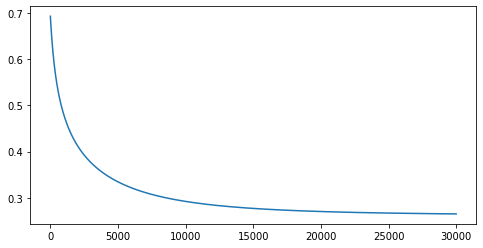

In [513]:
from sklearn import datasets

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1

N = 12 # training samples

# X = np.concatenate((iris.data[50:60], iris.data[100:110]), axis = 0)
X = np.reshape(np.concatenate((iris.data[50:50+int(N/2)], iris.data[100:100+int(N/2)]), axis = 0), (4, N))
X = np.concatenate((X, np.ones((1,N))), axis = 0)
y = np.reshape(np.concatenate((iris.target[50:50+int(N/2)], iris.target[100:100+int(N/2)]), axis = 0), (1, N))

X_holdout = np.reshape(np.concatenate((iris.data[50+int(N/2):100], iris.data[100+int(N/2):150]), axis = 0), (4, 100-N))
X_holdout = np.concatenate((X_holdout, np.ones((1,100-N))), axis = 0)
y_holdout = np.reshape(np.concatenate((iris.target[50+int(N/2):100], iris.target[100+int(N/2):150]), axis = 0), (1, 100-N))


def sigmoid_function( x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)
    
def sigmoid(x):
    return np.array([sigmoid_function(value) for value in x])

def compute_gradients(x, y_true, y_pred):
    # derivative of binary cross entropy
    difference =  y_pred - y_true
    gradients_w = np.matmul(x, difference.T)
    gradients_w = np.array([np.mean(grad) for grad in gradients_w])

    return gradients_w

def compute_loss(y_true, y_pred):
    # binary cross entropy
    y_zero_loss = y_true * np.log(y_pred + 1e-9)
    y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)

def predict(theta, x):
    probabilities = sigmoid(np.matmul(theta, x))
    return [1 if p > 0.5 else 0 for p in probabilities]

def fit(x, y, epochs):
    
    theta = np.zeros(x.shape[0])
    
    for i in range(epochs):
        y_pred = sigmoid(np.matmul(theta, x))
        loss = compute_loss(y, y_pred)
        
        # error_w, error_b = compute_gradients(x, y, y_pred)
        theta =  theta - learning_rate * compute_gradients(x, y, y_pred)

        y_pred_to_class = predict(theta, x)
        
        losses.append(loss)
        
    return losses, theta


learning_rate = 2e-3
losses = []

losses, theta = fit(X, y, 30000)

y_pred = predict(theta, X_holdout)

plt.plot(losses)

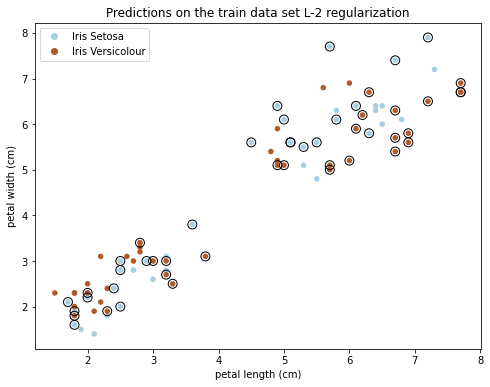

In [514]:
index_error = (y_pred - y_holdout).flatten() != 0

plt.figure(figsize=(8,6))
p1 = plt.scatter(X_holdout[2,:], X_holdout[3,:], alpha=1, c=y_holdout, cmap='Paired', s=20)
plt.scatter(X_holdout[2, index_error], X_holdout[3, index_error], marker='o', s=80, facecolors='none', edgecolors='k')
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Predictions on the train data set L-2 regularization")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

In [502]:
X

array([[7. , 3.2, 4.7, 1.4, 6.4, 3.2, 4.5, 1.5, 6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3, 6.5, 2.8, 4.6, 1.5, 5.7, 2.8, 4.5, 1.3],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]])